In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import operator
import math

In [ ]:
#Clean data
e_data = pd.read_csv("https://www.dropbox.com/s/ey2y94hyfclgl98/clean_data.csv?dl=1")

In [ ]:
print (e_data)

In [83]:
cols = ['Latitude', 'Longitude']
#cols = ['Country Name','Latitude', 'Longitude']
#rows = ['Country Name']

x = e_data[cols]
#y = e_data[rows]
y = e_data['Country Name']
print (x.head())
print (y.head())

   Latitude  Longitude
0    19.246    145.616
1    53.008   -162.008
2    53.191   -161.859
3    21.527    143.081
4    53.292   -162.331
0    United States
1    United States
2    United States
3    United States
4    United States
Name: Country Name, dtype: object


In [53]:
def euclideanDistance(instance1, instance2):
    distance = 0
    for x in range(len(instance1)):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [60]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(instance, trainingSet[x])
        distances.append(dist)
    locs = np.argsort(distances)
    return locs[:k]

In [93]:
testInstance = x.loc[y == 'France']
display(testInstance)

,Latitude,Longitude
93,13.2450,-44.9220
94,-18.4250,-132.9230
95,-17.8570,-178.6460
96,15.6740,-46.7120
97,-11.3850,166.3320
...,...,...
18512,-10.6273,164.9682
18513,-10.8889,165.9801
18514,-29.1551,60.9158
18515,13.3118,-44.8777


In [94]:
neighbors = getNeighbors(x.values, testInstance.values[0], 5)
print(y[neighbors])

93       France
10241    France
18515    France
10971    France
15203    France
Name: Country Name, dtype: object


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.9169559412550067


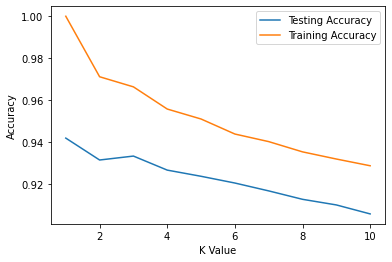

In [103]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
 
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()
